In [17]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); sys.path.insert(0, '../../EG2DataMiningPackage/')
from my_tools import *
from plot_tools import *
from notebook_tools import *
%matplotlib inline

In [46]:
def print_output(particle=dict(), p=(1,1,1), v=(0,0,0), t_off=0 , flag=0):
    '''
    p is 3-momentum
    '''
    p_mag = np.sqrt( np.square(p[0]) + np.square(p[1]) + np.square(p[2]) ) 
    p_components = np.array(p)*1./p_mag
    print '2'
    print particle['pid'],' ',p_components[0],' ',p_components[1],' ',p_components[2],' ',p_mag
    print particle['mass'],' ',particle['charge'],' '
    print v[0],' ',v[1],' ',v[2],' ',t_off,' ',flag,' '
    
    
def output2file(particle=dict(), p=(1,1,1), outputfile=None, v=(0,0,0), t_off=0 , flag=0):
    '''
    p is 3-momentum in cartesizan coordinates
    '''
    p_mag = np.sqrt( np.square(p[0]) + np.square(p[1]) + np.square(p[2]) ) 
    p_components = np.array(p)*1./p_mag
    outputfile.write('%d'%particle['pid']+' %f'%p_components[0]+' %f'%p_components[1]+' %f'%p_components[2]+' %f'%p_mag+'\n')
    outputfile.write('%f'%particle['mass']+' %d'%particle['charge']+'\n')
    outputfile.write('%f'%v[0]+' %f'%v[1]+' %f'%v[2]+' %d'%t_off+' %d'%flag+'\n')

In [47]:
def print_event( Pe, Pprotons ):    
    print_output( electron , Pe )
    for Pp in Pprotons:
        print_output( proton , Pp )  
        
def output_event( Pe=None, outputfile=None, Pprotons=None ):    
    # momenta are in spherical coordinates
    Nparticles = 1 
    outputfile.write('%d\n'%Nparticles)
    output2file( electron , Pe , outputfile)
    if Pprotons is not None:
        Nparticles = Nparticles + len(Pprotons)
        for Pp in Pprotons:
            output2file( proton , Pp , outputfile)  

# simulation of (e,e') events with a electrons from our data

In [48]:
columns = ['Pe_P','Pe_theta','Pe_phi','Pe_x','Pe_y','Pe_z']
data=dict()
for target in ['C12','Al27','Fe56','Pb208']:
    data[target] = read_root("/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA_300Pmiss600/SRC_e2p_adjusted_300Pmiss600_%s_PrecFiducials.root"%target, columns=columns )

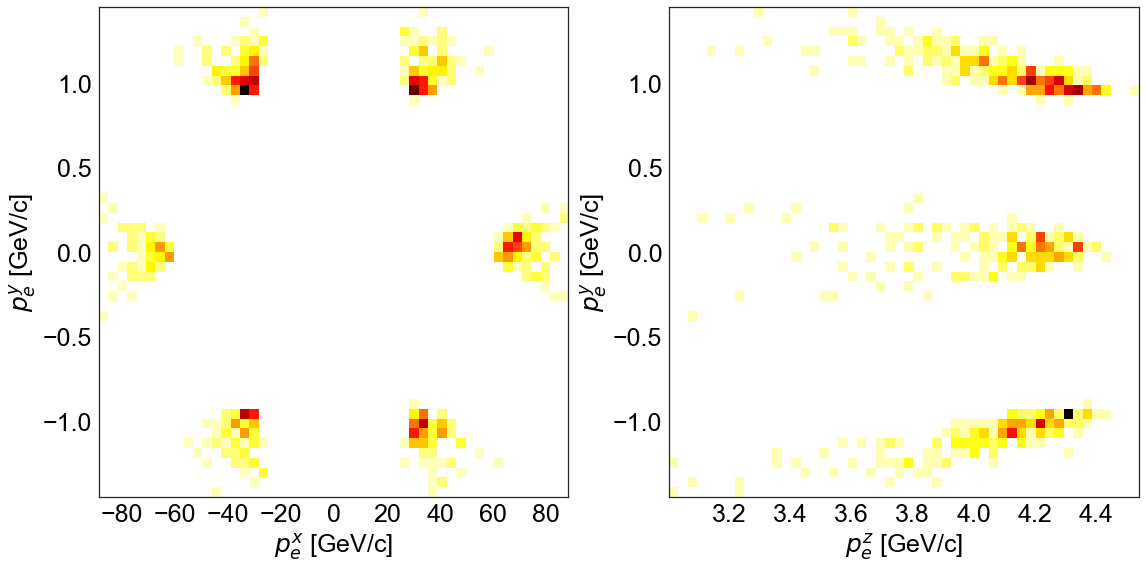

In [52]:
fig = plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
dataset = pd.concat([data['C12'],data['Al27'],data['Fe56'],data['Pb208']])
plot_2d_hist(180./np.pi*dataset['Pe_x'],dataset['Pe_y']
             ,xlabel=r'$p_e^x$ [GeV/c]',ylabel=r'$p_e^y$ [GeV/c]',ax=ax);
ax=fig.add_subplot(1,2,2)
plot_2d_hist(dataset['Pe_z'],dataset['Pe_y']
             ,xlabel=r'$p_e^z$ [GeV/c]',ylabel=r'$p_e^y$ [GeV/c]',ax=ax);
plt.tight_layout()

In [28]:
run = 890

In [29]:
electron = dict({'mass':0.000511,'charge':-1,'pid':11})

In [56]:
Nevents = len(dataset)
N_times = 100 # the number of times we generate each electron
generated_df = pd.DataFrame()
outputfile = open('/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run,'w')
ctr_event = 0
for i_event,data_event in dataset.iterrows():
    if ctr_event%(Nevents/10)==0: 
        print '%.0f'%(100.0*ctr_event/Nevents)+'%'
    Pe_x = data_event['Pe_x']
    Pe_y = data_event['Pe_y']
    Pe_z = data_event['Pe_z']
    Pe = ( Pe_x , Pe_y , Pe_z )
    ctr_event += 1
    for i_times in range(N_times):
        output_event( Pe=Pe, outputfile=outputfile )
        generated_df=generated_df.append({ 'Pe_x':Pe_x,'Pe_y':Pe_y,'Pe_z':Pe_z
                                         },ignore_index=True)    
print 'done. wrote',len(generated_df),'events into\n'
print '/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run 

0%
10%
20%
30%
40%
0%
10%
0%
10%
20%
30%
0%
done. wrote 62600 events into

/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run890.txt


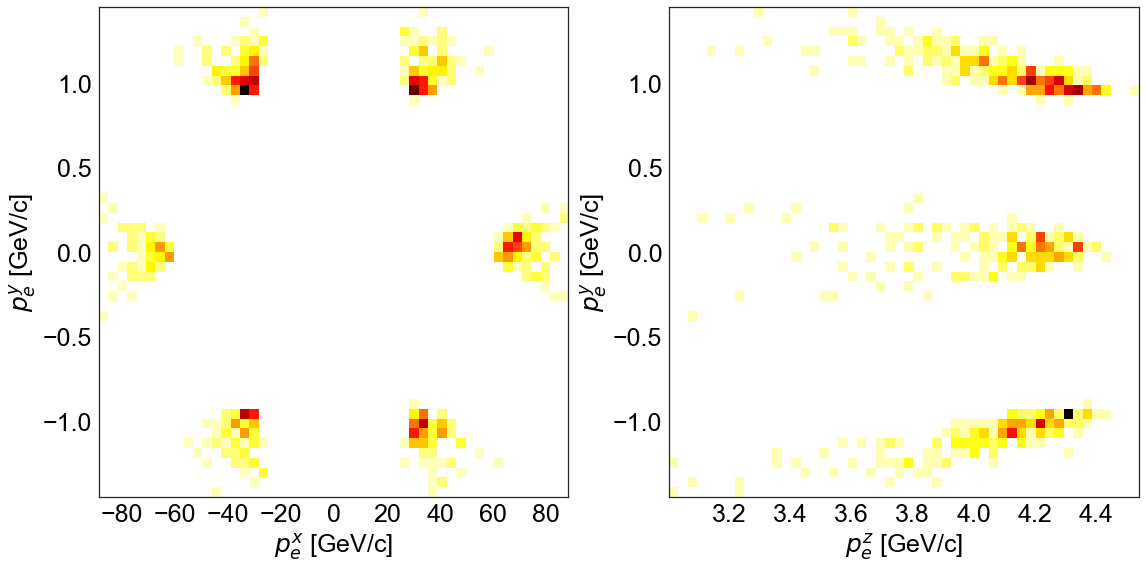

In [57]:
fig = plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,2,1)
plot_2d_hist(180./np.pi*generated_df['Pe_x'],generated_df['Pe_y']
             ,xlabel=r'$p_e^x$ [GeV/c]',ylabel=r'$p_e^y$ [GeV/c]',ax=ax);
ax=fig.add_subplot(1,2,2)
plot_2d_hist(generated_df['Pe_z'],generated_df['Pe_y']
             ,xlabel=r'$p_e^z$ [GeV/c]',ylabel=r'$p_e^y$ [GeV/c]',ax=ax);
plt.tight_layout()

# simulation of (e,e'p) with a fixed electron

In [5]:
run = 100

In [6]:
electron = dict({'mass':0.000511,'charge':-1,'pid':11})
proton = dict({'mass':0.938272,'charge':1,'pid':2212})
Pp_min,Pp_max = 0.2,1.0

In [7]:
# a single electron that passes RECSIS cuts...
Pe = (-0.137*4.306 , -0.339*4.306 , 0.956*4.306 ) 

In [8]:
generated_df = pd.DataFrame()
N_events = 1000 #000
outputfile = open('/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run,'w')
for i_event in range(N_events):
    if i_event%(N_events/10)==0: print '%.0f'%(100*float(i_event)/N_events)+'%'
    # unifrom proton momentum magnitude in the desired range
    Pp_mag = np.random.uniform( Pp_min , Pp_max )
    # unifrom proton direction
    Pp_cos_theta = np.random.uniform( -1 , 1 )
    Pp_theta = np.arccos(Pp_cos_theta)
    Pp_phi = np.random.uniform( 0 , 2*np.pi )
    
    Pp = ( Pp_mag*np.sin(Pp_theta)*np.cos(Pp_phi), Pp_mag*np.sin(Pp_theta)*np.sin(Pp_phi), Pp_mag*np.cos(Pp_theta) )
    #print_event( Pe, [Pp] )
    output_event( Pe, [Pp] , outputfile )
    
    generated_df=generated_df.append({'Pp_mag':Pp_mag,'Pp_theta':Pp_theta,'Pp_phi':Pp_phi
                                     },ignore_index=True)
    
print 'done. wrote\n'+'/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run%d.txt'%run 

0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
done. wrote
/Users/erezcohen/Desktop/DataMining/GSIM/eg_txtfiles/run100.txt


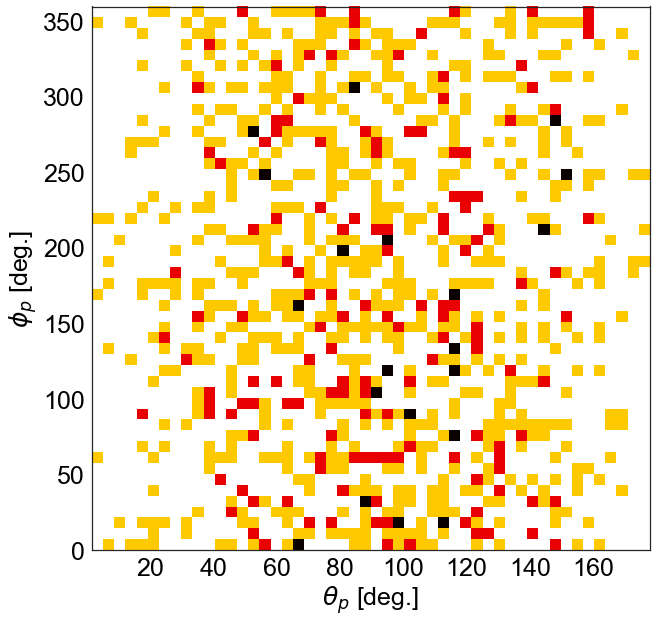

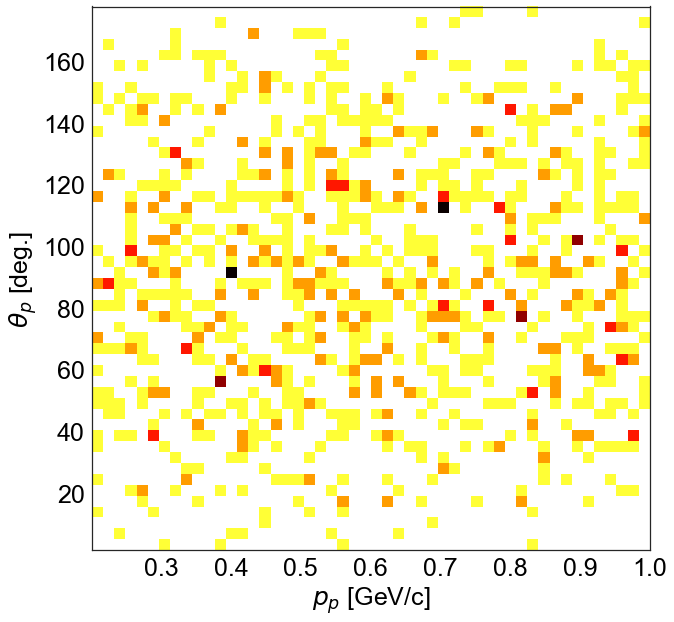

In [9]:
plot_2d_hist(180./np.pi*generated_df['Pp_theta'],180./np.pi*generated_df['Pp_phi'],xlabel=r'$\theta_p$ [deg.]',ylabel=r'$\phi_p$ [deg.]');
plot_2d_hist(generated_df['Pp_mag'],180./np.pi*generated_df['Pp_theta'],xlabel=r'$p_p$ [GeV/c]',ylabel=r'$\theta_p$ [deg.]');